In [1]:
import pandas as pd
import numpy as np

import os, json

## Read rss data

In [2]:
# Read Json files
path_to_json = 'rssData'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
#print(json_files)

In [3]:
# Go through Json files 
base_dir = 'rssData'

#Get all files in the directory

data_list = []
for file in os.listdir(base_dir):

    #If file is a json, construct it's full path and open it, append all json data to list
    if 'json' in file:
        json_path = os.path.join(base_dir, file)
        json_data = pd.read_json(json_path, lines=True)
        data_list.append(json_data)

#print(data_list)

In [4]:
# Get text data and remove empty texts
all_text=[]
for i in range(len(data_list)):
    if (data_list[i].text.values!=''):
        text=list(data_list[i].text)
#         print(type(text))
        all_text.append(text)
        #print(data_list[i].text)
        #print(text)
#print(all_text)

In [5]:
import spacy

C:\Users\msalehi\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
nlp = spacy.load('en_core_web_sm')

In [7]:
# function to clean data
#lower case
#remove stop words
#lemmatization

def cleanData(doc):
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    
    return " ".join(final_token)

In [8]:
all_text_df= pd.DataFrame(all_text, columns=['text'])
all_text_df.head()

,text
0,"The 911 service as it existed until July 28, 2..."
1,"DanielMiessler Created/Updated: July 25, 2022 ..."
2,The 911 service as it exists today.For the pas...
3,DanielMiesslerMy first thought on the whole di...
4,"DanielMiesslerWell, our congressional heroes f..."


In [9]:
cl = cleanData(all_text_df['text'][0])
len(cl)

6580

In [10]:
all_text_df['clean'] = all_text_df.apply(lambda row:cleanData (row['text']),axis=1)

In [11]:
all_text_df.head()

,text,clean
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...


In [12]:
#function to Tokenization
def Token(clean):
    token_list=[]
    clean = nlp(clean)
    for token in clean:
        token_list.append(token)
    return(token_list)      

In [13]:
all_text_df['token'] = all_text_df.apply(lambda row:Token (row['clean']),axis=1)

In [14]:
all_text_df.head()

,text,clean,token
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...,"[911, service, exist, july, 28, 2022.911[.]re,..."
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...,"[danielmiessler, create, update, july, 25, 202..."
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...,"[911, service, exist, today.for, past, seven, ..."
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...,"[danielmiesslermy, think, discussion, sure, mu..."
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...,"[danielmiesslerwell, congressional, hero, fina..."


### Named Entity Recognition (NER)

In [15]:
#function to NER 
# Iterate over the predicted entities
def NER(clean):
    ner_list=[]
    clean = nlp(clean)
    for ent in clean.ents:
        ner_list.append(ent.label_)
    return(ner_list)   

In [16]:
all_text_df['ner_tag'] = all_text_df.apply(lambda row:NER (row['clean']),axis=1)

In [17]:
all_text_df.head()

,text,clean,token,ner_tag
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...,"[911, service, exist, july, 28, 2022.911[.]re,...","[CARDINAL, DATE, DATE, CARDINAL, ORG, DATE, DA..."
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...,"[danielmiessler, create, update, july, 25, 202...","[DATE, NORP, CARDINAL, DATE]"
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...,"[911, service, exist, today.for, past, seven, ...","[CARDINAL, DATE, CARDINAL, CARDINAL, ORG, DATE..."
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...,"[danielmiesslermy, think, discussion, sure, mu...",[PERSON]
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...,"[danielmiesslerwell, congressional, hero, fina...","[ORG, DATE, ORG, PERSON]"


In [18]:
# len(all_text_df['ner_tag'][0])

In [19]:
# len(all_text_df['pos_tag'][0])

In [20]:
doc=nlp(all_text_df['clean'][0])

In [21]:
POS_counts = doc.count_by(spacy.attrs.POS)
# POS_counts

In [22]:
# for k,v in (POS_counts.items()):
#     print(doc.vocab[k].text,round(v/len(doc),2))

In [23]:
# for k,v in (POS_counts.items()):
#     print(doc.vocab[k].text,v)

In [24]:
# for k,v in (POS_counts.items()):
#     print(doc.vocab[k].text,round(v/len(doc),2))

In [25]:
# freq_list=[[] for _ in range(2)]
# freq_list

In [26]:
# POS_tag Frequency function
# Calculate frequency based on the lenght of each row (freuency of each word divided by the lenght of total text)
# Filtering frequency of above 10%

def Freq(clean):
    freq_list=[]
    doc = nlp(clean)
    POS_counts = doc.count_by(spacy.attrs.POS)
    for k,v in (POS_counts.items()):
        v = round(v/len(doc),2)
        if v> 0.1 :
            freq_list.append([doc.vocab[k].text,v])
        
    return(freq_list)

In [27]:
Freq(doc) 

[['NOUN', 0.5], ['VERB', 0.12], ['ADJ', 0.12]]

In [28]:
all_text_df['Freq_pos'] = all_text_df.apply(lambda row:Freq (row['clean']),axis=1)

In [29]:
all_text_df.head()

,text,clean,token,ner_tag,Freq_pos
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...,"[911, service, exist, july, 28, 2022.911[.]re,...","[CARDINAL, DATE, DATE, CARDINAL, ORG, DATE, DA...","[[NOUN, 0.5], [VERB, 0.12], [ADJ, 0.12]]"
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...,"[danielmiessler, create, update, july, 25, 202...","[DATE, NORP, CARDINAL, DATE]","[[NOUN, 0.42], [VERB, 0.2], [ADJ, 0.18]]"
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...,"[911, service, exist, today.for, past, seven, ...","[CARDINAL, DATE, CARDINAL, CARDINAL, ORG, DATE...","[[NOUN, 0.51], [VERB, 0.13], [ADJ, 0.12], [PRO..."
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...,"[danielmiesslermy, think, discussion, sure, mu...",[PERSON],"[[NOUN, 0.45], [VERB, 0.24], [ADJ, 0.11], [PRO..."
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...,"[danielmiesslerwell, congressional, hero, fina...","[ORG, DATE, ORG, PERSON]","[[VERB, 0.18], [ADJ, 0.11], [NOUN, 0.51]]"


### Perform Frequency of NER for one Json file

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from collections import Counter

list(Counter(all_text_df['ner_tag'][0]).keys()) # equals to list(set(words))
list(Counter(all_text_df['ner_tag'][0]).values()) # counts the elements' frequency

[40, 14, 7, 4, 2, 1, 2]

In [35]:
data= {'ner':list (Counter(all_text_df['ner_tag'][0]).keys()),'freq':list (Counter(all_text_df['ner_tag'][0]).values())}

In [36]:
df2 = pd.DataFrame(data)

In [37]:
df2

,ner,freq
0,CARDINAL,40
1,DATE,14
2,ORG,7
3,PERSON,4
4,TIME,2
5,QUANTITY,1
6,GPE,2


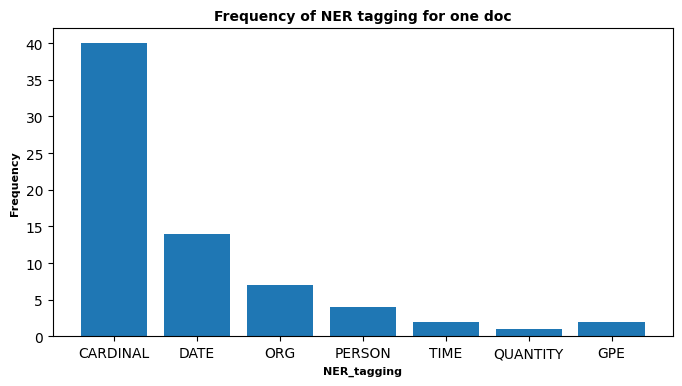

In [38]:
fig = plt.figure(figsize =(8, 4))
plt.bar(df2['ner'],df2['freq'])
plt.xlabel("NER_tagging",fontweight ='bold',fontsize=8)
plt.ylabel("Frequency",fontweight ='bold',fontsize=8)
plt.title("Frequency of NER tagging for one doc",fontweight ='bold',fontsize=10)
plt.show()

In [39]:
[ent for ent in (nlp(all_text_df['clean'][0])).ents if ent.label_=='ORG']

[microsoft, websiteâs, âwe, quality.my, ccp, ccp, new york times]

In [40]:
from spacy import displacy

In [41]:
displacy.render((nlp(all_text_df['clean'][0])), style='ent', jupyter=True)

In [44]:
options = {'ents': ['ORG', 'PERSON','GPE']}

displacy.render((nlp(all_text_df['clean'][2])), style='ent', jupyter=True, options=options)